<a href="https://colab.research.google.com/github/Coreight98/Paran_ajou_Project_Anything/blob/main/%EC%9D%B4%EC%96%B4%EB%B3%B4%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.models as models
import torch.nn as nn
GoogleNet = models.googlenet(pretrained=True)
GoogleNet.fc = nn.Linear(in_features=1024, out_features=35)
GoogleNet

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import PIL
import time
from sklearn.neighbors import KNeighborsClassifier
import random
import torch

Mounted at /content/drive


In [3]:
train_location = './drive/MyDrive/data/DTD_final/'

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

class PatternDataset():
    def __init__(self, image, mode, transforms):
        super().__init__()
        self.image = image
        self.mode = mode
        self.transforms = transforms

    def __getitem__(self, index):
        image_name = self.image[index]
        image = Image.open(train_location + image_name)
        image = image.resize((224,224))
        #레이블 입력
        label = 1
        label = torch.tensor(label,dtype=torch.long)
        #이미지 변형 적용용
        image = self.transforms(image)
        return image, label

    def __len__(self):
        return len(self.image)
    def ind(index):
      image=self.image[index]
      return image


In [4]:
if __name__ == '__main__':
    device ='cuda'
    if device == 'cuda':
      torch.cuda.manual_seed_all(777)
    SEED = 777
    seed_everything(SEED)
    #데이터 셋 불러오고 정규화
    transform = transforms.Compose(
        [transforms.ToTensor(),
          transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
          ]
    )
    train_images = os.listdir(train_location)
    print(train_images)
    net=GoogleNet
    PATH = './drive/MyDrive/data/DTD_save/GoogleNet_save.pth'
    net.load_state_dict(torch.load(PATH))

    net.eval()
    X = np.load('./drive/MyDrive/data/DTD_save/DTD_features.npy')
    X = np.reshape(X,(3624,35))
    Y = np.zeros((3624,1))
    Y = np.reshape(Y,(3624,1))
    reg = KNeighborsClassifier(n_neighbors=4)
    reg.fit(X,Y)
    
    img = PIL.Image.open('./drive/MyDrive/data/DTD/braided_0078.jpg') ##################여기가 input image입니다요
    img = img.resize((224,224))
    emp = torch.empty((1,3,224,224),dtype=torch.float32)
    img_t =transform(img)
    emp[0] = img_t
    input = net(emp)
    neighbor_index= reg.kneighbors(input.detach().numpy(),n_neighbors=4,return_distance=False)
    neighbor_index.sort()
    

['zigzagged_0067.jpg', 'perforated_0039.jpg', 'interlaced_0191.jpg', 'interlaced_0137.jpg', 'stratified_0123.jpg', 'interlaced_0158.jpg', 'stratified_0089.jpg', 'interlaced_0103.jpg', 'stratified_0144.jpg', 'stratified_0115.jpg', 'interlaced_0125.jpg', 'interlaced_0109.jpg', 'interlaced_0124.jpg', 'stratified_0154.jpg', 'zigzagged_0100.jpg', 'stratified_0045.jpg', 'stratified_0086.jpg', 'stratified_0163.jpg', 'zigzagged_0074.jpg', 'interlaced_0057.jpg', 'zigzagged_0066.jpg', 'interlaced_0093.jpg', 'zigzagged_0119.jpg', 'stratified_0118.jpg', 'zigzagged_0102.jpg', 'zigzagged_0092.jpg', 'interlaced_0180.jpg', 'interlaced_0179.jpg', 'interlaced_0112.jpg', 'zigzagged_0078.jpg', 'zigzagged_0023.jpg', 'stratified_0073.jpg', 'stratified_0128.jpg', 'stratified_0094.jpg', 'stratified_0074.jpg', 'interlaced_0121.jpg', 'stratified_0120.jpg', 'interlaced_0099.jpg', 'stratified_0064.jpg', 'interlaced_0143.jpg', 'stratified_0146.jpg', 'interlaced_0150.jpg', 'interlaced_0162.jpg', 'zigzagged_0083.jpg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


braided_0140.jpg


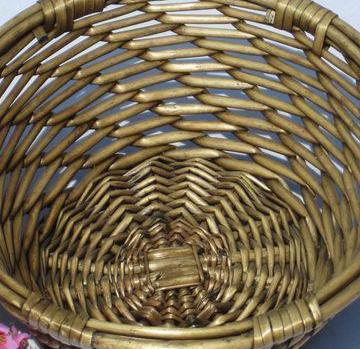

braided_0136.jpg


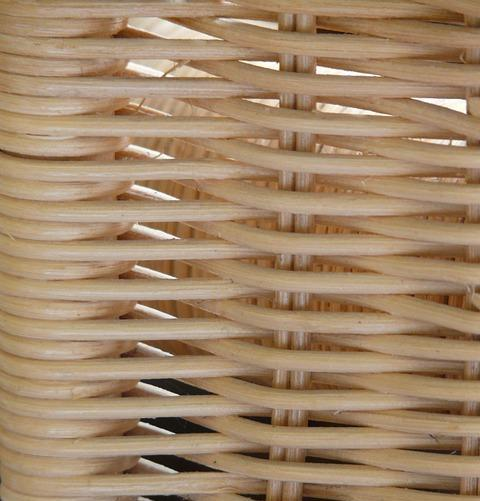

braided_0146.jpg


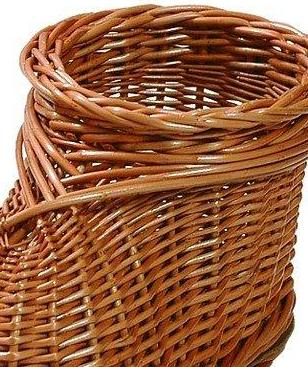

braided_0078.jpg


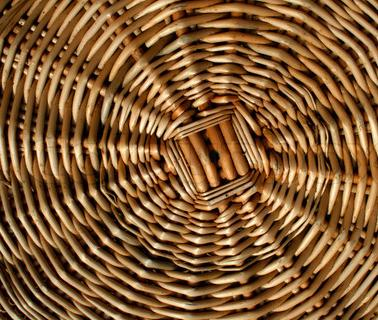

In [5]:
##### 아웃풋 이미지 4장 출력 #####
from IPython.display import Image 
for ind in neighbor_index[0]:
  print(train_images[ind])
  name='./drive/MyDrive/data/DTD/%s'%(train_images[ind])
  img=Image(name)
  display(img)
from PIL import Image

In [6]:
%cd /content/
!git clone https://github.com/ultralytics/yolov5.git

%cd /content/yolov5/
!pip install -r requirements.txt

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 6303, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 6303 (delta 8), reused 8 (delta 1), pack-reused 6281
Receiving objects: 100% (6303/6303), 8.56 MiB | 31.07 MiB/s, done.
Resolving deltas: 100% (4310/4310), done.
/content/yolov5
     |████████████████████████████████| 645kB 24.1MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
from glob import glob
furniture = {'사무용의자', '가죽암체어', '디반침대', '옷장', '화장대', '바테이블', '유아용침대', '샤워커튼', '어린이의자', '수납가구', '패브릭암체어',
             '가죽소파', '스툴/벤치', '풋스툴/쿠션형스툴', '책상/컴퓨터책상', '커피테이블/보조테이블', '영아용의자', '식탁의자', '커튼', '바의자', '소파베드',
             '더블/퀸/킹침대', '리클라이너', '로프트/2층침대', '라탄암체어', '패브릭소파', '싱글/수퍼싱글+침대', '식탁', '블라인드', '어린이침대', '카페의자', '어린이옷장', '어린이테이블'}

val_imgg_list = glob('/content/drive/MyDrive/파란학기/가구 이미지_최종/images/라탄암체어/*.jpg')

val_img_path = val_imgg_list[0:10]
print(len(val_imgg_list))
weights_path = '/content/drive/MyDrive/data/DTD_save/best.pt'
for item in val_img_path:
  !python detect.py --weights "{weights_path}" --img 416 --conf 0.3 --source "{item}" --save-txt 

163
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=True, source='/content/drive/MyDrive/파란학기/가구 이미지_최종/images/라탄암체어/라탄암체어_1.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/data/DTD_save/best.pt'])
YOLOv5 🚀 v5.0-99-g3f74cd9 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7067395 parameters, 0 gradients, 16.4 GFLOPS
image 1/1 /content/drive/MyDrive/파란학기/가구 이미지_최종/images/라탄암체어/라탄암체어_1.jpg: 416x416 1 chair, Done. (0.074s)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels
Done. (0.472s)
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='', exist_ok=False, hide_conf=False, hide_labels=Fals

############## 1
# 1
11 17 577 574


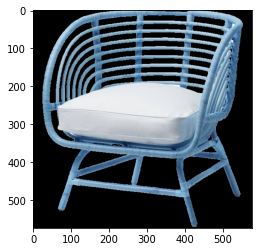

############## 2
# 1
232 249 288 265


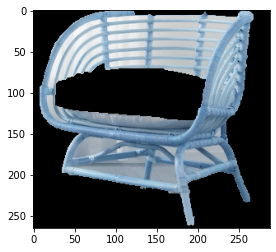

############## 3
# 1
165 192 433 364


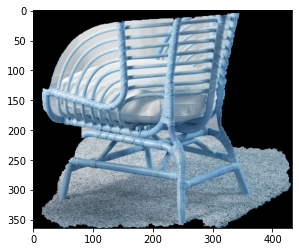

############## 4
# 1
67 6 477 586


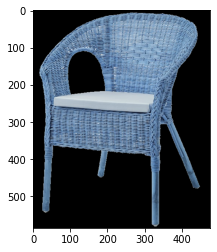

############## 5
# 1
488 255 111 268


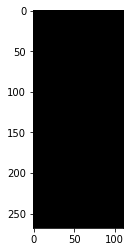

############## 6
# 1
73 9 456 583


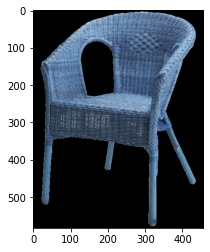

############## 7
# 1
180 210 262 313


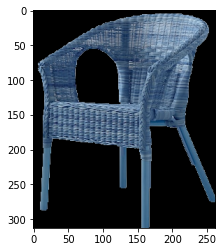

############## 8
# 1
135 117 343 408


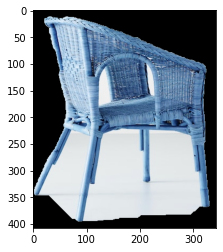

############## 9
# 1
3 18 589 565


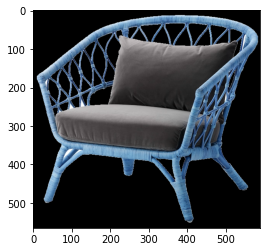

############## 10
detection failed.
[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0,

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import glob

output = []

for i in range(1,len(val_img_path)+1):
  print("##############",i)
  if i == 1 :
    path = '/content/yolov5/runs/detect/exp/labels/*'
    file_list = glob.glob(path)
  else:
    path = '/content/yolov5/runs/detect/exp%d/labels/*'%i
    file_list = glob.glob(path)
  try:
    path = file_list[0]
    f = open(path, 'r')
    lines = f.readlines()
    if len(lines)>=2:
      continue
  except:
    print('detection failed.')
    continue
  src = cv2.imread(val_img_path[i-1], cv2.IMREAD_COLOR)
  k=1
  for line in lines:
      print("#",k)
      
      token = line.split(' ')
      x=float(token[1])
      y=float(token[2])
      w=float(token[3])
      h=float(token[4])

      x1=x-w/2
      y1=y-h/2
      

      x1_pixel = int(x1*src.shape[1])
      w_pixel = int(w*src.shape[1])
      y1_pixel = int(y1*src.shape[0])
      h_pixel = int(h*src.shape[0])
      
      print(x1_pixel,y1_pixel,w_pixel,h_pixel)
      rectangle = (x1_pixel,y1_pixel,w_pixel,h_pixel)
      # 초기 마스크 생성
      mask = np.zeros(src.shape[:2], np.uint8)

      #   grabCut에 사용할 임시 배열 생성
      bgdModel = np.zeros((1, 65), np.float64)
      fgdModel = np.zeros((1, 65), np.float64)

      # grabCut 실행
      cv2.grabCut(src, # 원본 이미지
            mask,       # 마스크
            rectangle,  # 사각형
            bgdModel,   # 배경을 위한 임시 배열
            fgdModel,   # 전경을 위한 임시 배열
            5,          # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화

      #배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
      mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

      # 이미지에 새로운 마스크를 곱행 배경을 제외
      image_rgb_nobg = src * mask_2[:, :, np.newaxis]
      A = image_rgb_nobg[y1_pixel:(y1_pixel+h_pixel),x1_pixel:(x1_pixel+w_pixel)]
      output.append(A)
      # plot
      plt.imshow(output[i-1])
      plt.show()
  f.close()

In [ ]:
# 여기서부터 수정
# 히스토그램 비교 (histo_compare.py)

import cv2, numpy as np
import matplotlib.pylab as plt

def imgRC(img):
    image = img
    imageR = cv2.resize(image,(300,300),interpolation= cv2.INTER_AREA)
    imageC = imageR[100:200,100:200]
    return imageR, imageC

img1 = imgRC(img1)[0]
img2 = imgRC(img2)[0]
img3 = imgRC(img3)[0]
img4 = imgRC(img4)[0]
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0], None, [256], [0, 255])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
# methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR,
#            'INTERSECT':cv2.HISTCMP_INTERSECT,
#            'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}

methods = {'CORREL' :cv2.HISTCMP_CORREL,'INTERSECT':cv2.HISTCMP_INTERSECT, 'CHISQR_ALT':cv2.HISTCMP_CHISQR_ALT,
           'CHISQR':cv2.HISTCMP_CHISQR}

ans = []
num = [[],[],[],[]]
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
        num[j].append(float("%7.2f"%ret))
    print()

for i in range(1,len(imgs)):
    if num[0][i] >= 0.18 and num[1][i] >= 0.18:
        ans.append(i+1)
print(ans)

plt.show()
